# **probelem statement**

predict whether a credit card application will be approved or not based on the applicant’s details.

##**Introduction**

Credit card approval is a crucial process for banks and financial institutions. The traditional approach to credit card approval involves manual verification of the applicant’s details, which can be time-consuming and error-prone. In recent years, machine learning techniques have been used to automate the credit card approval process and improve its accuracy.

In this project, we aim to predict whether a credit card application will be approved or not based on the applicant’s details. We will use a dataset containing information about past credit card applications to train our machine learning model.

We will use various machine learning algorithms such as logistic regression, decision trees, and random forests,etc to build our model. We will evaluate the performance of each algorithm using metrics such as accuracy, precision, recall, and F1 score.

Our goal is to build a machine learning model that can accurately predict credit card approval and help financial institutions streamline their credit card approval process.

# **features of Datasets**

Data set (Credit_card.csv)

1.Ind_ID: Client ID

2.Gender: Gender information

3.Car_owner: Having car or not

4.Propert_owner: Having property or not

5.Children: Count of children

6.Annual_income: Annual income

7.Type_Income: Income type

8.Education: Education level

9.Marital_status: Marital_status

10.Housing_type: Living style

11.Birthday_count: Use backward count from current day (0), -1 means yesterday.

12.Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

13.Mobile_phone: Any mobile phone

14.Work_phone: Any work phone

15.Phone: Any phone number

16.EMAIL_ID: Any email ID

17.Type_Occupation: Occupation

18.Family_Members: Family size


Another data set (Credit_card_label.csv) contains two key pieces of information

1.ID: The joining key between application data and credit status data, same is Ind_ID

2.Label: 0 is application approved and 1 is application rejected.


# **Basic Exploration**

In [727]:
#importing necessary libraries.

import numpy as np  # Numerical calucations.

import pandas as pd # Manipulating dataset.

import matplotlib.pyplot as plt # Data visualization.

import seaborn as sns # Data visualization.

import warnings   # ignore warnings.
warnings.filterwarnings('ignore')

In [728]:
credit_card=pd.read_csv("Credit_card.csv") # Read Credit_card.csv file using pandas library.
credit_card.head() # open first 5 records.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [729]:
credit_card.shape #shape of dataset.

(1548, 18)

In [730]:
credit_card.info() # information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [731]:
credit_card.describe(include='all') # Statistical information about dataset.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [732]:
credit_card_label=pd.read_csv("Credit_card_label.csv") # Read Credit_card_label.csv file using pandas library.
credit_card_label.head() # open first 5 records.

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [733]:
credit_card_label.shape #shape of dataset.

(1548, 2)

In [734]:
credit_card_label.info() # information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


In [735]:
credit_card_label.describe(include="all") # Statistical information about dataset.

,Ind_ID,label
count,1.548000e+03,1548.000000
mean,5.078920e+06,0.113049
std,4.171759e+04,0.316755
min,5.008827e+06,0.000000
25%,5.045070e+06,0.000000
50%,5.078842e+06,0.000000
75%,5.115673e+06,0.000000
max,5.150412e+06,1.000000


In [736]:
Credit_card=credit_card.merge(credit_card_label,how="right") # combine two dataset with common feature Ind_Id.
Credit_card.head()  # open first 5 records.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [737]:
Credit_card_dc=Credit_card.copy() # copy the file.

In [738]:
Credit_card_dc.head() # open first 5 records.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [739]:
Credit_card_dc.shape #shape of dataset.

(1548, 19)

In [740]:
Credit_card_dc.info()  # information about dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [741]:
Credit_card_dc.describe(include="all") # Statistical information about dataset.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


# **Data Cleaning**

In [742]:
Credit_card_dc.info()  # information about dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [743]:
Credit_card_dc.columns # Dataset column names

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [744]:
# remove unwanted columns
Credit_card_dc=Credit_card_dc.drop(['Ind_ID','Birthday_count', 'Employed_days', 'Mobile_phone','Work_Phone','Phone','EMAIL_ID','Family_Members', 'Housing_type','Type_Occupation'],axis=1)

In [745]:
Credit_card_dc.shape # shape of dataset.

(1548, 9)

In [746]:
Credit_card_dc=Credit_card_dc.drop_duplicates() # remove the duplicates.

In [747]:
Credit_card_dc=Credit_card_dc.rename(columns={'label':'Approve'}) # RENAME THE FEATURE

In [748]:
Credit_card_dc.shape # shape of dataset after remove duplicates.

(1147, 9)

In [749]:
Credit_card_dc.info()  # information about dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1546
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          1140 non-null   object 
 1   Car_Owner       1147 non-null   object 
 2   Propert_Owner   1147 non-null   object 
 3   CHILDREN        1147 non-null   int64  
 4   Annual_income   1126 non-null   float64
 5   Type_Income     1147 non-null   object 
 6   EDUCATION       1147 non-null   object 
 7   Marital_status  1147 non-null   object 
 8   Approve         1147 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 89.6+ KB


<Axes: >

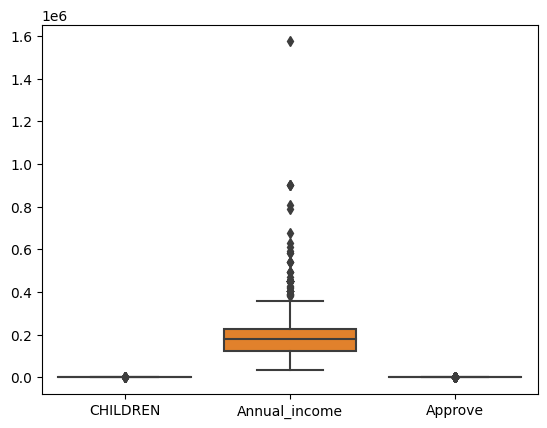

In [750]:
sns.boxplot(Credit_card_dc) # boxplot of dataset to observe outliers or not.

In [751]:
Credit_card_dc.isnull().sum()  # show the null values in the data set.

GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     21
Type_Income        0
EDUCATION          0
Marital_status     0
Approve            0
dtype: int64

In [752]:
Credit_card_dc['GENDER'].unique() # unique values in the feature.

Credit_card_dc['Annual_income']=Credit_card_dc['Annual_income'].fillna(round(Credit_card_dc['Annual_income'].median()))

In [753]:
Credit_card_dc['GENDER'].mode() # mode of the feature.

0    F
Name: GENDER, dtype: object

In [754]:
Credit_card_dc['GENDER']=Credit_card_dc['GENDER'].fillna('F') # fill with new values in the null values.

In [755]:
round(Credit_card_dc['Annual_income'].median())# find median of feature and round them because having outliers.

180000

In [756]:
Credit_card_dc['Annual_income']=Credit_card_dc['Annual_income'].fillna(round(Credit_card_dc['Annual_income'].median())) # fill with new values in the null values.

In [757]:
Credit_card_dc.isnull().sum()  # show the null values in the data set.

GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Approve           0
dtype: int64

## **Dealing with Outliers**

<Axes: >

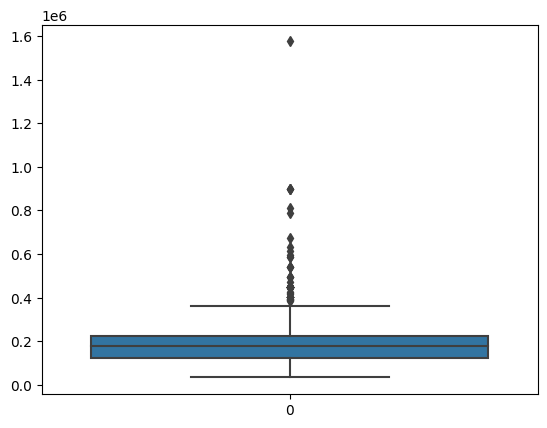

In [758]:
sns.boxplot(Credit_card_dc['Annual_income']) # boxplot of dataset to observe outliers or not.

In [759]:
Q1=Credit_card_dc['Annual_income'].quantile(0.25)
Q2=Credit_card_dc['Annual_income'].quantile(0.50)
Q3=Credit_card_dc['Annual_income'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)

121500.0
180000.0
225000.0
103500.0


In [760]:
u_l=Q3+1.5*IQR
l_l=Q1-1.5*IQR
print(u_l)
print(l_l)

380250.0
-33750.0


In [761]:
outliers=Credit_card_dc[(Credit_card_dc['Annual_income']>u_l)|(Credit_card_dc['Annual_income']<l_l)]

In [762]:
outliers.shape

(61, 9)

In [763]:
Credit_card_dc['Annual_income']=Credit_card_dc['Annual_income'].clip(lower=l_l,upper=u_l)

<Axes: >

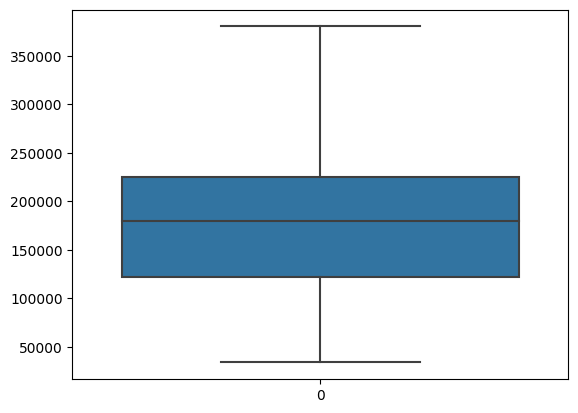

In [764]:
sns.boxplot(Credit_card_dc['Annual_income'])

In [765]:
credit_card_approval=Credit_card_dc.copy() # copy the file.

In [766]:
credit_card_approval.isnull().sum() # show the null values in the data set.

GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Approve           0
dtype: int64

### **Encoding**

In [767]:
credit_card_approval.columns # dataset columns.

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Approve'],
      dtype='object')

In [768]:
#removing senstive features and they not usefull for predections.
credit_card_approval=credit_card_approval.drop(['GENDER', 'CHILDREN', 'EDUCATION', 'Marital_status',],axis=1)

In [769]:
#one hot encoding or dummy encoding.
credit_card_approval=pd.get_dummies(credit_card_approval,columns=['Type_Income','Car_Owner', 'Propert_Owner'],drop_first=True)

In [770]:
credit_card_approval.columns # after encoding dataset columns.

Index(['Annual_income', 'Approve', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working', 'Car_Owner_Y',
       'Propert_Owner_Y'],
      dtype='object')

In [771]:
credit_card_approval.head() # dataset first 5 records.

,Annual_income,Approve,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Car_Owner_Y,Propert_Owner_Y
0,180000.0,1,1,0,0,1,1
1,315000.0,1,0,0,0,1,0
3,180000.0,1,0,0,0,1,0
5,315000.0,1,1,0,0,1,0
7,180000.0,1,1,0,0,0,0


In [772]:
credit_card_approval.info() # information anbout dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Annual_income              1147 non-null   float64
 1   Approve                    1147 non-null   int64  
 2   Type_Income_Pensioner      1147 non-null   uint8  
 3   Type_Income_State servant  1147 non-null   uint8  
 4   Type_Income_Working        1147 non-null   uint8  
 5   Car_Owner_Y                1147 non-null   uint8  
 6   Propert_Owner_Y            1147 non-null   uint8  
dtypes: float64(1), int64(1), uint8(5)
memory usage: 64.8 KB


In [773]:
credit_card_approval.isnull().sum() # to see having any missing values or not.

Annual_income                0
Approve                      0
Type_Income_Pensioner        0
Type_Income_State servant    0
Type_Income_Working          0
Car_Owner_Y                  0
Propert_Owner_Y              0
dtype: int64

# **Feature Trasformation**

In [774]:
credit_card_approval['Annual_income'].skew()

0.7025889442547673

### **Root Trasformation**

In [775]:
credit_card_approval['Annual_income']=credit_card_approval['Annual_income']**(1/3)

In [776]:
credit_card_approval['Annual_income'].skew()

0.08263714698254442

## **Split Data**

In [777]:
# we are divide the whole data into two parts x and y
X=credit_card_approval.drop('Approve',axis=1) # remove the target feature or output feature is Approve and all values store in X.
Y=credit_card_approval['Approve'] # in the dataset take output or target feature and store in Y.

In [778]:
X.head() # first 5 records of X.

,Annual_income,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Car_Owner_Y,Propert_Owner_Y
0,56.462162,1,0,0,1,1
1,68.040921,0,0,0,1,0
3,56.462162,0,0,0,1,0
5,68.040921,1,0,0,1,0
7,56.462162,1,0,0,0,0


In [779]:
Y.head()  # first 5 records of Y.

0    1
1    1
3    1
5    1
7    1
Name: Approve, dtype: int64

### **Train-Test Split**

In [780]:
# By using train_test_split we split the X AND Y data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [781]:
x_train.head() # first 5 records of x_train.

,Annual_income,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Car_Owner_Y,Propert_Owner_Y
848,63.906765,0,0,0,0,0
62,56.462162,0,0,1,0,0
109,60.822020,0,0,1,0,0
207,56.462162,0,0,0,1,0
130,48.274469,1,0,0,0,0


In [782]:
y_train.head() # first 5 records of y_train.

848    0
62     1
109    1
207    0
130    1
Name: Approve, dtype: int64

# **Feature scalling**

In [783]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train['Annual_income']=sc.fit_transform(x_train[['Annual_income']])
x_test['Annual_income']=sc.transform(x_test[['Annual_income']])

In [784]:
x_train.head()

,Annual_income,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Car_Owner_Y,Propert_Owner_Y
848,0.934391,0,0,0,0,0
62,0.070395,0,0,1,0,0
109,0.576386,0,0,1,0,0
207,0.070395,0,0,0,1,0
130,-0.879842,1,0,0,0,0


In [785]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 848 to 619
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Annual_income              917 non-null    float64
 1   Type_Income_Pensioner      917 non-null    uint8  
 2   Type_Income_State servant  917 non-null    uint8  
 3   Type_Income_Working        917 non-null    uint8  
 4   Car_Owner_Y                917 non-null    uint8  
 5   Propert_Owner_Y            917 non-null    uint8  
dtypes: float64(1), uint8(5)
memory usage: 18.8 KB


In [786]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1229 to 337
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Annual_income              230 non-null    float64
 1   Type_Income_Pensioner      230 non-null    uint8  
 2   Type_Income_State servant  230 non-null    uint8  
 3   Type_Income_Working        230 non-null    uint8  
 4   Car_Owner_Y                230 non-null    uint8  
 5   Propert_Owner_Y            230 non-null    uint8  
dtypes: float64(1), uint8(5)
memory usage: 4.7 KB


#**feature selection**

In [787]:
corr=credit_card_approval.corr() # find correaltions of dataset.
corr

,Annual_income,Approve,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Car_Owner_Y,Propert_Owner_Y
Annual_income,1.000000,0.002074,-0.208522,0.033898,-0.024017,0.242317,0.025256
Approve,0.002074,1.000000,0.075802,-0.063028,-0.053963,-0.019551,0.000594
Type_Income_Pensioner,-0.208522,0.075802,1.000000,-0.140302,-0.439565,-0.124827,0.083877
Type_Income_State servant,0.033898,-0.063028,-0.140302,1.000000,-0.299235,0.015481,-0.029264
Type_Income_Working,-0.024017,-0.053963,-0.439565,-0.299235,1.000000,0.039087,-0.060689
Car_Owner_Y,0.242317,-0.019551,-0.124827,0.015481,0.039087,1.000000,-0.020443
Propert_Owner_Y,0.025256,0.000594,0.083877,-0.029264,-0.060689,-0.020443,1.000000


<Axes: >

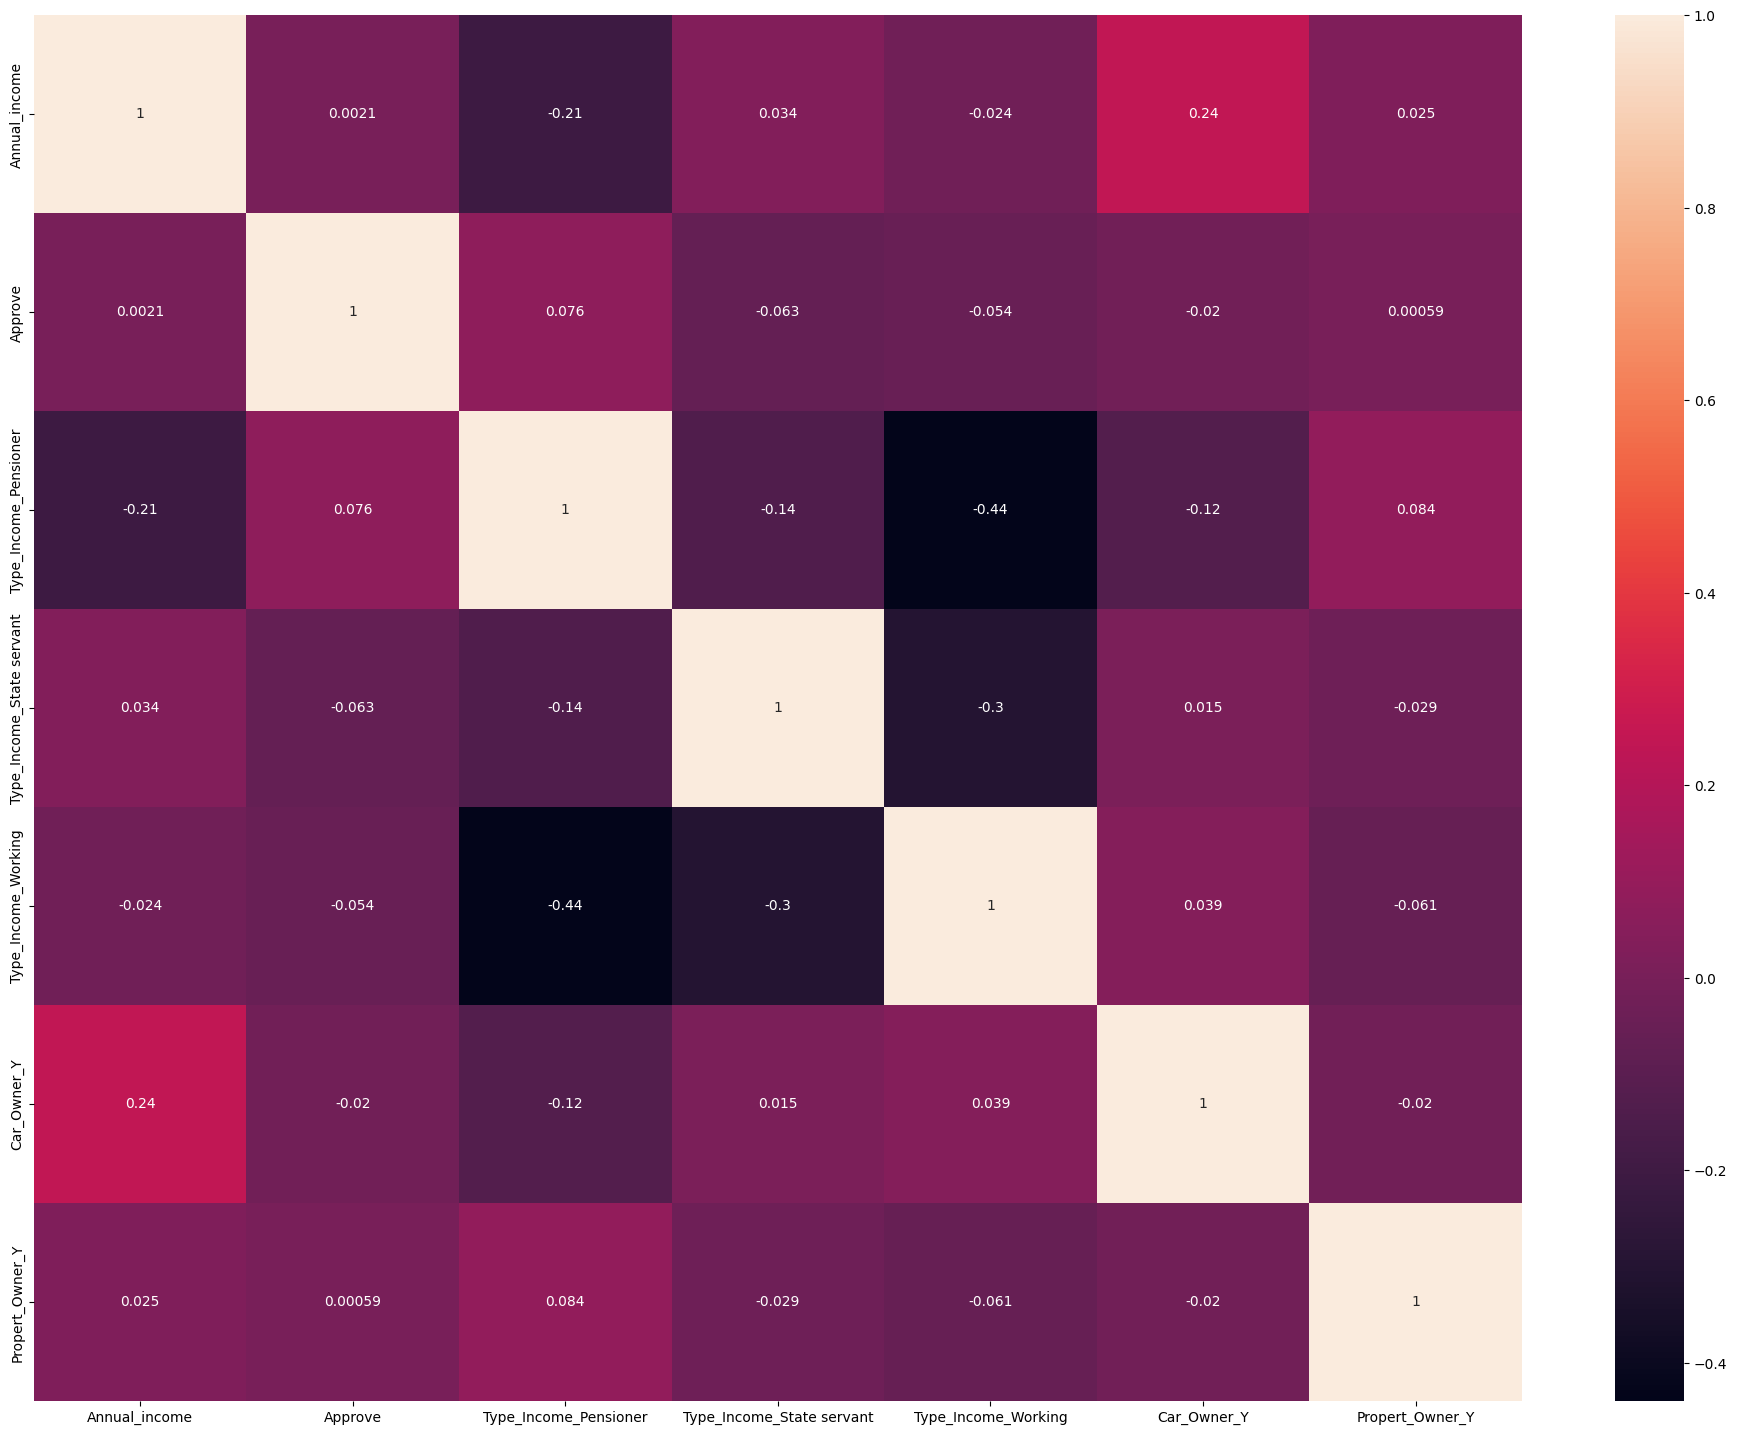

In [788]:
plt.figure(figsize=(24, 18))  # figure size of plot.
sns.heatmap(corr,annot=True) # plot the correaltions of dataset.

# **Model selection**

## **Model-1**

In [789]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression.
model=LogisticRegression()

# Train the data.
model.fit(x_train,y_train)

# Make predictions on new data.
y_predt=model.predict(x_test)
y_predt_train=model.predict(x_train)

#Evalution.
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,Y,cv=5)
a=accuracy_score(y_test,y_predt)
a_tr=accuracy_score(y_train,y_predt_train)
p=precision_score(y_test,y_predt)
r=recall_score(y_test,y_predt)
cm=confusion_matrix(y_test,y_predt)
print("test accuracy:",a)
print("train accuracy:",a_tr)
print("cross validation score:",score.mean())
print( "precision:",p)
print("recall:",r)
print("confusion matrix:",cm)

test accuracy: 0.9217391304347826
train accuracy: 0.8756815703380589
cross validation score: 0.8849212075185114
precision: 0.0
recall: 0.0
confusion matrix: [[212   0]
 [ 18   0]]


## **Model-2**

In [790]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier.
clf = DecisionTreeClassifier(max_depth=10)

# Train the classifier on your data.
clf.fit(x_train, y_train)

# Make predictions on new data.
y_predt_clf= clf.predict(x_test)
y_predt_train=clf.predict(x_train)

#Evalution.
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X,Y,cv=5)
clf_a=accuracy_score(y_test,y_predt_clf)
clf_t=accuracy_score(y_train,y_predt_train)
clf_p=precision_score(y_test,y_predt_clf)
clf_r=recall_score(y_test,y_predt_clf)
clf_cm=confusion_matrix(y_test,y_predt_clf)
print("test accuracy:",clf_a)
print("train accuracy:",clf_t)
print("cross validation score:",score.mean())
print( "precision:",clf_p)
print("recall:",clf_r)
print("confusion matrix:",clf_cm)

test accuracy: 0.8956521739130435
train accuracy: 0.8931297709923665
cross validation score: 0.8543914942092273
precision: 0.0
recall: 0.0
confusion matrix: [[206   6]
 [ 18   0]]


## **Model-3**

In [791]:
# Create a RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier
# Train the classifier on your data.
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

# Make predictions on new data.
y_predt_rfc=rfc.predict(x_test)
y_predt_rfc_train=rfc.predict(x_train)

#Evalution.
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,Y,cv=5)
rfc_a=accuracy_score(y_test,y_predt_rfc)
rfc_t=accuracy_score(y_train,y_predt_rfc_train)
rfc_p=precision_score(y_test,y_predt_rfc)
rfc_r=recall_score(y_test,y_predt_rfc)
rfc_cm=confusion_matrix(y_test,y_predt_rfc)
print("test accuracy:",rfc_a)
print("train accuracy:",rfc_t)
print("cross validation score:",score.mean())
print( "precision:",rfc_p)
print("recall:",rfc_r)
print("confusion matrix:",rfc_cm)

test accuracy: 0.8695652173913043
train accuracy: 0.9007633587786259
cross validation score: 0.8491475223087146
precision: 0.0
recall: 0.0
confusion matrix: [[200  12]
 [ 18   0]]


## **Model-4**

In [792]:
# Create a KNeighborsClassifier.
from sklearn.neighbors import KNeighborsClassifier

# import KNeighborsClassifier model
knn = KNeighborsClassifier()

# train model
knn.fit(x_train, y_train)

# Make predictions on new data.
y_predt_k=knn.predict(x_test)
y_predt_kt=knn.predict(x_train)

#Evalution.
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,X,Y,cv=5)
a_k=accuracy_score(y_test,y_predt_k)
a_kt=accuracy_score(y_train,y_predt_kt)
p_k=precision_score(y_test,y_predt_k)
r_k=recall_score(y_test,y_predt_k)
cm_k=confusion_matrix(y_test,y_predt_k)
print("test accuracy:",a_k)
print("train accuracy:",a_kt)
print("cross validation score:",score.mean())
print( "precision:",p_k)
print("recall:",r_k)
print("confusion matrix:",cm_k)

test accuracy: 0.9173913043478261
train accuracy: 0.8778625954198473
cross validation score: 0.8395557243212455
precision: 0.0
recall: 0.0
confusion matrix: [[211   1]
 [ 18   0]]


# **Hyper parameter tunning**

In [793]:
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid={"n_neighbors":list(range(1,21))}
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 6}

In [794]:
# Create a KNeighborsClassifier.
from sklearn.neighbors import KNeighborsClassifier
# import KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=6)
# train model
knn.fit(x_train, y_train)
# Make predictions on new data.
y_predt_k=knn.predict(x_test)
y_predt_kt=knn.predict(x_train)
#Evalution.
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,X,Y,cv=5)
a_k=accuracy_score(y_test,y_predt_k)
a_kt=accuracy_score(y_train,y_predt_kt)
p_k=precision_score(y_test,y_predt_k)
r_k=recall_score(y_test,y_predt_k)
cm_k=confusion_matrix(y_test,y_predt_k)
print("test accuracy:",a_k)
print("train accuracy:",a_kt)
print("cross validation score:",score.mean())
print( "precision:",p_k)
print("recall:",r_k)
print("confusion matrix:",cm_k)

test accuracy: 0.9217391304347826
train accuracy: 0.8756815703380589
cross validation score: 0.8657262198595024
precision: 0.0
recall: 0.0
confusion matrix: [[212   0]
 [ 18   0]]


## **Model-5**

In [795]:
# Create a SupportVectorClassifier.
from sklearn.svm import SVC

# import KNeighborsClassifier model
svc=SVC()

# train model
svc.fit(x_train,y_train)

# Make predictions on new data.
y_predt_svc=svc.predict(x_test)
y_predt_svc_train=svc.predict(x_train)

#Evalution.
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,X,Y,cv=5)
svc_a=accuracy_score(y_test,y_predt_svc)
svc_t=accuracy_score(y_train,y_predt_svc_train)
svc_p=precision_score(y_test,y_predt_rfc)
svc_r=recall_score(y_test,y_predt_rfc)
svc_cm=confusion_matrix(y_test,y_predt_rfc)
print("test accuracy:",svc_a)
print("train accuracy:",svc_t)
print("cross validation score:",score.mean())
print( "precision:",svc_p)
print("recall:",svc_r)
print("confusion matrix:",svc_cm)

test accuracy: 0.9217391304347826
train accuracy: 0.8756815703380589
cross validation score: 0.8849212075185114
precision: 0.0
recall: 0.0
confusion matrix: [[200  12]
 [ 18   0]]


# **Hyper parameter tunning**

In [796]:
from sklearn.model_selection import GridSearchCV
estimator=SVC()
param_grid={"kernel":["linear","RBF","sigmoid","poly"]}
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'kernel': 'linear'}

In [797]:
# Create a SupportVectorClassifier.
from sklearn.svm import SVC

# import KNeighborsClassifier model
svc=SVC(kernel="linear")

# train model
svc.fit(x_train,y_train)

# Make predictions on new data.
y_predt_svc=svc.predict(x_test)
y_predt_svc_train=svc.predict(x_train)

#Evalution.
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,X,Y,cv=5)
svc_a=accuracy_score(y_test,y_predt_svc)
svc_t=accuracy_score(y_train,y_predt_svc_train)
svc_p=precision_score(y_test,y_predt_rfc)
svc_r=recall_score(y_test,y_predt_rfc)
svc_cm=confusion_matrix(y_test,y_predt_rfc)
print("test accuracy:",svc_a)
print("train accuracy:",svc_t)
print("cross validation score:",score.mean())
print( "precision:",svc_p)
print("recall:",svc_r)
print("confusion matrix:",svc_cm)

test accuracy: 0.9217391304347826
train accuracy: 0.8756815703380589
cross validation score: 0.8849212075185114
precision: 0.0
recall: 0.0
confusion matrix: [[200  12]
 [ 18   0]]


# **Conclusion**

After using all models we are use decision tree classifer with max_depth=10 wil give best pedictions.